In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

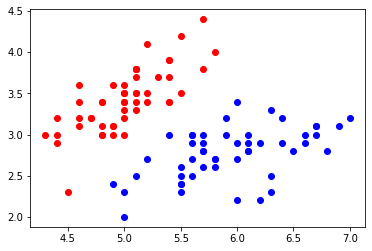

In [3]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler.fit(X)
X_standard = standardscaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)  ## hard margin
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0)

In [6]:
def plot_decision_boundary(model, axis):

  x0, x1 = np.meshgrid(
      np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
      np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1),
  )
  X_new = np.c_[x0.ravel(),x1.ravel()]

  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)

  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


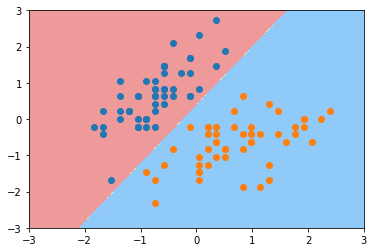

In [8]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

In [9]:
svc = LinearSVC(C=0.01)  ## soft margin
svc.fit(X_standard,y)

LinearSVC(C=0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


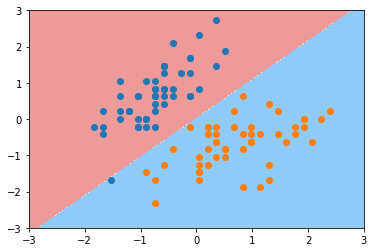

In [10]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

In [11]:
svc.coef_

array([[ 0.437897  , -0.41091829]])

In [12]:
svc.intercept_

array([0.00592611])

In [15]:
def plot_svc_decision_boundary(model, axis):

  x0, x1 = np.meshgrid(
      np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
      np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1),
  )
  X_new = np.c_[x0.ravel(),x1.ravel()]

  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)

  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

  w = model.coef_[0]
  b = model.intercept_[0]

  #w0*x0+w1*x1+b=0
  plot_x = np.linspace(axis[0],axis[1],200)
  up_y = -w[0]/w[1]*plot_x-b/w[1]+1/w[1]
  down_y = -w[0]/w[1]*plot_x-b/w[1]-1/w[1]

  up_index = (up_y>=axis[2])&(up_y <= axis[3])
  down_index = (down_y>=axis[2])&(down_y<=axis[3])

  plt.plot(plot_x[up_index],up_y[up_index],color="black")
  plt.plot(plot_x[down_index],down_y[down_index],color="black")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


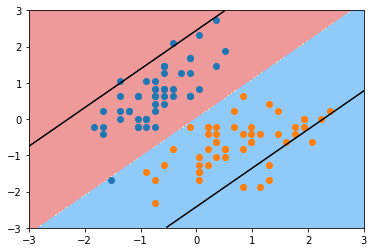

In [16]:
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

In [19]:
svc2 = LinearSVC(C=1e9)  ## hard margin
svc2.fit(X_standard,y)

LinearSVC(C=1000000000.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


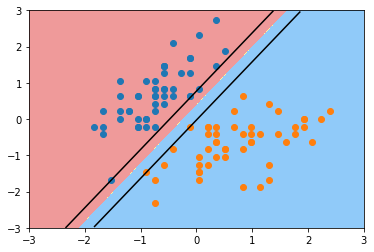

In [22]:
plot_svc_decision_boundary(svc2,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()